<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

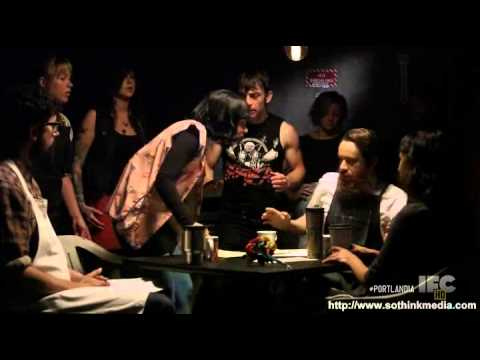

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd

'C:\\Users\\sharm\\Documents\\Lambda-School\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
shops['coffee_shop_name'].value_counts().to_frame()

,coffee_shop_name
Epoch Coffee,400
Halcyon,300
The Factory - Cafe With a Soul,244
Venezia Italian Gelato,200
Houndstooth Coffee,200
...,...
Lucky Lab Coffee,25
Sister Coffee,17
Kowabunga Coffee,16
The Marvelous Vintage Tea Party Co.,10


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
shops['full_review_text'].value_counts().to_frame()

,full_review_text
"11/9/2016 1 check-in Listed in In Search of Fantastic Coffee So, I really didn't want to write this review. I didn't want to tell anyone how awesome The Factory - Cafe With a Soul is because I don't want it overrun and super busy with no place to sit like so many other decent coffee shops in Austin. I happened to come in here with a friend mid-week and we sat here for several hours, enjoying the peace and quiet, the atmosphere, and the awesome coffee. This place is a little eclectic - lots of peculiar art, books, games, knick-knacks, and an almost head-scratching drink and food menu. Waffles and pop tarts...and beer? And... coffee mojitos? Well, it works. Whatever is going on here, it works fabulously. They serve Stumptown Coffee, which as someone from the Northwest, I totally appreciate. They also brew coffee correctly. There is not a hint of bitterness or overcooked milk going on here. The iPad ordering screens are mostly cool, (although they need more options for customization) and the million different types of seating, (couches, pillows, swings, big chairs, little chairs, bar seating, regular tables) is both delightful and refreshing. The baristas make foam art - something that I have only seen at Houndstooth here in Austin. Hanging out here was a wonderful experience - this is a five star establishment, the best coffee house I've been to in Austin, and I will be back - time and time again. Double espresso with tonic water. Beautiful Macha A beary lovely mocha!",4
"11/23/2016 1 check-in My best friend and I came to The Factory after seeing it on a couple of best new Austin brunch lists. It's super cute and trendy, to the point where it feels kind of out of place in a strip mall. Although I loved the interior design and general ambiance of the place, I was a little disappointed with the menu. This is more of a coffee shop than a cafe - their food options are pretty limited. My friend ordered the chicken and waffles and I ordered Nutella waffles with strawberries and bananas. For the price I paid, the portions were definitely on the smaller side. I enjoyed my meal still, but it's hard to mess up Nutella and fruit, so I wasn't particularly impressed. I would love to come back to study sometime but since they don't have wifi, I don't think it'll be likely.",4
11/21/2016 1 check-in This place is fantastic! Ideal place for grabbing a frothy matcha latte and a chicken & waffle. A bit different in the way that you order. Definitely a nice hang-out for millenials or anyone who works in the area and is on a lunch break. Wifi is within reach but they don't have it themselves.,4
"11/12/2016 Great coffee, food and atmosphere! Love the set-up. Order on an iPad and they call your name out when your food is ready.",4
"10/12/2016 1 check-in Checked out The Factory this past Sunday with my husband. We wanted to try their delicious looking waffles and were definitely not disappointed. Husband ordered an iced coffee drink that was delicious, but it wasn't as good as my Golden Age of Milk Tea, well worth the 10 minute wait for the tea to steep. We both ordered the Nutella Waffle and it was perfect. From the wood plate with the AMAZING paper liner printed with a famous person and an inspirational quote from them. I wanted just the paper because it was so cute and well done. The waffle is basically half a waffle, spread with Nutella and a layer of bananas, then folded in half. While small, it was a perfect amount, the bananas balancing out the sweetness of the Nutella. The waffle itself was crisp perfection, providing a crunch to the meal. The menu is very limited: there was the nutella waffle and a fried chicken waffle. I'm hoping they'll eventually serve other waffles, but totally respect their decision to start small. The space is gorgeous. From the swings to the mural above the bar, everything looks meticulously planned out. And here is where my biggest advice comes: this place is really not for kids. The way the seating 

In [10]:
#Stip away the dates
import re
dates = []
for text in shops['full_review_text']:
    dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])
shops['review_date'] = dates

In [11]:
shops['review_date'].value_counts()

10/9/2016     31
9/18/2016     30
11/2/2016     27
11/20/2016    27
12/4/2016     26
              ..
3/10/2013      1
7/4/2013       1
6/7/2011       1
1/23/2014      1
5/1/2013       1
Name: review_date, Length: 1592, dtype: int64

In [12]:
shops['full_review_text']=shops['full_review_text'].astype(str)

In [13]:
#Remove date
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ". join(x.split()[1:]))
# extract checkin 
shops['full_review_text'] = shops['full_review_text'].str.replace(r"(\d+ check-ins?)", "")

shops['coffee_shop_name'] = shops['coffee_shop_name'].str.lower().str.strip()
shops['full_review_text'] = shops['full_review_text'].str.lower().str.strip()

In [14]:
shops.sample(10)

,coffee_shop_name,full_review_text,star_rating,review_date
4545,sorrento’s coffee,love this place! great local business! rad chi...,5.0 star rating,7/18/2015
1449,holy grounds,first to review where can you drink fair trade...,5.0 star rating,7/10/2012
2784,bennu coffee,for what it is this is a great place to go to....,4.0 star rating,3/26/2016
2294,mary’s cafe,i love this place! what a great menu! i have n...,5.0 star rating,10/9/2015
1162,houndstooth coffee,omg i love this coffee house! im all about sup...,5.0 star rating,8/15/2016
3568,cenote,"went today, and i have to say that the vibe an...",3.0 star rating,10/15/2016
2031,the factory - cafe with a soul,the greeting of an atmosphere it feels i creat...,5.0 star rating,11/16/2016
2633,third coast coffee roasting company,such a cool place. i love that we got to go be...,5.0 star rating,10/15/2016
4836,venezia italian gelato,"in short, it's the real deal. the creamy gelat...",5.0 star rating,6/6/2016
6215,stinson’s,"great coffee with almond milk, awesome veggie ...",4.0 star rating,7/23/2015


In [15]:
#star rating
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [17]:
#remove star rating text from columns
shops['star_rating'] = shops['star_rating'].str.replace('star rating', '')

In [18]:
shops.sample(10)

,coffee_shop_name,full_review_text,star_rating,review_date
858,brian’s brew,the mocha i had today was phenomenal. it's an ...,5.0,12/5/2012
895,legend coffee,they know what they are doing.....small food t...,5.0,3/20/2016
404,summermoon coffee bar,i'm a really big fan of summer moon and it's f...,4.0,7/29/2016
4289,irie bean coffee bar,the irie bean is a gem. the atmosphere and dec...,5.0,11/4/2010
6292,pacha,we came here on a saturday morning for some br...,4.0,3/20/2016
1389,caffe medici,"i will start out by saying, cafe medici makes ...",1.0,12/24/2013
5380,cuvée coffee bar,i love cuvee coffee roasters and you can find ...,4.0,9/5/2015
5891,kick butt coffee music & booze,"the place is great, all the staff is extremely...",2.0,2/10/2016
147,vintage heart coffee,"hmm, i'm kind of split on 3 or 4 stars here. w...",4.0,5/24/2015
2356,anderson’s coffee company,"we used to live in pdx, (portland or!) and now...",5.0,2/22/2016


In [21]:
#processing row text with spacy
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [20]:
def lemmatize_txt(text):
    # Store lemmas
    lemmas = [] 
    
    # Instantiate doc object
    doc = nlp(text) 
    
    # Loop through each token in text
    for token in doc:
        if token.lemma_:
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
                lemmas.append(token.lemma_)
    return ' '.join(lemmas)
shops['lemmatize_full_review_text'] = shops['full_review_text'].apply(lemmatize_txt)
shops['lemmatize_full_review_text'] = shops['lemmatize_full_review_text'].str.strip()
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,lemmatize_full_review_text
0,the factory - cafe with a soul,love love loved the atmosphere! every corner o...,5.0,11/25/2016,love love love atmosphere corner coffee shop s...
1,the factory - cafe with a soul,"listed in date night: austin, ambiance in aust...",4.0,12/2/2016,list date night austin ambiance austin beautif...
2,the factory - cafe with a soul,listed in brunch spots i loved the eclectic an...,4.0,11/30/2016,list brunch spot love eclectic homey plush dec...
3,the factory - cafe with a soul,very cool decor! good drinks nice seating howe...,2.0,11/25/2016,cool decor good drink nice seating overpriced ...
4,the factory - cafe with a soul,they are located within the northcross mall sh...,4.0,12/3/2016,locate northcross mall shopping center face ea...


In [22]:
shops['lemmatize_full_review_text'].value_counts().to_frame()

,lemmatize_full_review_text
spot super cute like eat pottery barn drink unique somewhat limited menu try chicken waffle surprisingly delicious drink tasty livin la vida mocha husband pour definitely return company price good regular stop rotation,4
cute eclectic furniture lot thing gorgeous seating vignette lot space classy decor thing watch wifi place work study great place chill friend 6 total find space play board game blast,4
craft coffee drink tea beer wine friendly staff good music nice atmosphere complete rope swing ceiling let forget amazing waffle nice place chill friend,4
love love love atmosphere corner coffee shop style swing order matcha latte muy fantastico order get drink pretty streamlined order ipad include beverage selection range coffee wine desire level sweetness checkout system get latte minute hope typical heart feather latte find list possibility art idea,4
greeting atmosphere feel create place speak free spirited soul matcha latte swing inside fit pillow waffle artist home computer encourage architecture book talk chess matcha latte lactose free milk house book,4
...,...
come eat italian place gelato dessert menu seriously yelp rescue think 8 10 different flavor gelato grant plain old raspberry vanilla chocolate character raspberry mix homemade ladyfinger yum vanilla mix homemade chocolate chip popcorn yummy stuff cornucopia door remember delicious decide fruit loop raspberry ladyfinger delicious date vanilla chocolate chip gelato remember fancy homemade chocolate banana waffle omg good place pretty new open couple month selection grow think like try breakfast option time waffle fruit loop mary tyler moore good birthday photo terri j. mary cafe,1
rotd 9/8/2015 decor shabby chic give old timey feeling little wooden stool table sit perfect couple 3 size order gelato depend size 4 different flavor serve pretty quiet music play soothe atmosphere wifi lock visibly password gigantic expect place stand room hot season impressed happy find froyo replacement gelato home,1
brunch biscuit gravy elk hash tasty,1
patient order coffee pour method perfection take time honestly need rush good cup coffee order today brew amor de dios love god dark roast look taste smooth light roast sip feel like get un abrazo de dios morning great brew well pour definitely go buy brew home staff friendly knowledgeable coffee brew method small space plenty seat average crowd nice art work,1


In [23]:
STOPWORDS = nlp.Defaults.stop_words.union([' ','coffee', "i've", "it's","i'm",'-','-PRON-'])

def tokenize_text(text):
    tokens = []
     # Instantiate doc object
    doc = nlp(text)
    """Add tokens w/o Stop Words"""
    for token in doc:
        if token.text not in STOPWORDS:
            tokens.append(token.text)
    return tokens

shops['tokens'] = shops['lemmatize_full_review_text'].apply(tokenize_text)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,lemmatize_full_review_text,tokens
0,the factory - cafe with a soul,love love loved the atmosphere! every corner o...,5.0,11/25/2016,love love love atmosphere corner coffee shop s...,"[love, love, love, atmosphere, corner, shop, s..."
1,the factory - cafe with a soul,"listed in date night: austin, ambiance in aust...",4.0,12/2/2016,list date night austin ambiance austin beautif...,"[list, date, night, austin, ambiance, austin, ..."
2,the factory - cafe with a soul,listed in brunch spots i loved the eclectic an...,4.0,11/30/2016,list brunch spot love eclectic homey plush dec...,"[list, brunch, spot, love, eclectic, homey, pl..."
3,the factory - cafe with a soul,very cool decor! good drinks nice seating howe...,2.0,11/25/2016,cool decor good drink nice seating overpriced ...,"[cool, decor, good, drink, nice, seating, over..."
4,the factory - cafe with a soul,they are located within the northcross mall sh...,4.0,12/3/2016,locate northcross mall shopping center face ea...,"[locate, northcross, mall, shopping, center, f..."


In [26]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [27]:

# Use the Function
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
101,place,3892,6060,1.0,0.018061,0.018061,0.511029
141,good,3606,5421,2.0,0.016157,0.034218,0.473477
131,great,2860,3959,3.0,0.011799,0.046017,0.375525
147,like,2274,3380,4.0,0.010074,0.056091,0.298582
441,come,1935,2642,5.0,0.007874,0.063965,0.254070


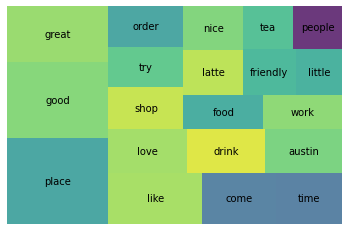

In [36]:

import squarify
import matplotlib.pyplot as plt

#Top 20 word
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
#How do we want to analyze these coffee shop tokens?¶
Overall Word / Token Count
View Counts by Rating
Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

In [37]:
shops['star_rating']= shops['star_rating'].astype('float')

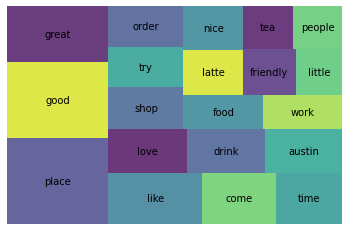

In [38]:
#Bad word count
wc_bad=  count(shops[shops['star_rating'] < 4]['tokens'])
wc_bad_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

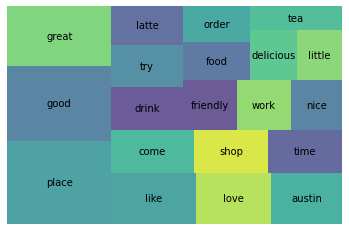

In [39]:
# Good word count
wc_good = count(shops[shops['star_rating'] >= 4]['tokens'])
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=0.8)
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [40]:

wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']
diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct_bad']], how='outer')
diff.head(20)

,word,appears_in_pct,appears_in_pct_bad
0,place,0.510749,0.512195
1,good,0.481596,0.439702
2,great,0.409121,0.235772
3,like,0.273290,0.403794
4,love,0.262704,0.141599
5,austin,0.258306,0.170732
6,come,0.241531,0.306233
7,shop,0.219870,0.216125
8,time,0.218567,0.287940
9,drink,0.207818,0.245257


In [41]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.sort_values(by='diff').head(20)

,word,appears_in_pct,appears_in_pct_bad,diff
3,like,0.273290,0.403794,-0.130504
16,order,0.165472,0.293360,-0.127888
135,ask,0.050651,0.149051,-0.098400
29,service,0.141042,0.235095,-0.094053
197,bad,0.038111,0.132114,-0.094003
44,taste,0.106678,0.191057,-0.084379
83,$,0.064169,0.147696,-0.083527
154,customer,0.044951,0.126016,-0.081065
247,maybe,0.030945,0.105014,-0.074069
86,review,0.077687,0.151084,-0.073397


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

